# Capstone Project: Battle of Neighborhoods - Scarborough, Toronto Neighborhood Analysis 
### Suresh 


### Project Description:

This Project would help the new Neighbors to take a better decision on choosing the best neighborhood out of many neighborhoods to build/buy/rent their houses in Scarborough ( Toronto ) based on the distribution of various facilities in and around that neighborhood. As an example, two randomly picked neighborhoods viz. Agincourt, Cedarbrae are compared and analyzed the top 10 most common venues in each of those two neighborhoods based on the number of visits by people in each of those places. 

K-mean clustering unsupervised machine learning algorithm has been used to cluster the venues based on the place category such as restaurants, park, coffee shop, gym etc. This would give a better understanding of the similarities and dissimilarities between the two chosen neighborhoods to retrieve more insights and to conclude with ease which neighborhood wins over other.



### Data Sets and APIs:

*Datasets used*:

BeautifulSoup package has been used to transform the data in the table on the Wikipedia page into the pandas dataframe

The Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, has been used in order to obtain the neighborhood data aong with postal codes and transformed the data into a pandas dataframe

*Foursquare API*:

This project would use Four-square API as its prime data gathering source as it has a database of more than 105 million places, especially their places API which provides the ability to perform location search, location sharing and details about a business. Photos, tips and reviews jolted by Foursquare users can also be used in many productive ways to add value to the results. 

*Foursquare API* search feature would be enabled to collect the nearby places of the neighborhoods. Due to http request limitations the number of places per neighborhood parameter would reasonably be set to 100 and the radius parameter would be set to 700.

*Folium*- Python visualization library would be used to visualize the neighborhoods cluster distribution of Seattle city over an interactive leaflet map.

Extensive comparative analysis of two randomly picked neighborhoods world be carried out to derive the desirable insights from the outcomes using python’s scientific libraries Pandas, NumPy and Scikit-learn.

Unsupervised machine learning algorithm K-mean clustering has been applied to form the clusters of different categories of places residing in and around the neighborhoods.
These clusters from each of those two chosen neighborhoods would be analyzed individually collectively and comparatively to derive the conclusions.

### Python packages and Dependencies:

- Pandas 	- 	Library for Data Analysis
- NumPy 	– 	Library to handle data in a vectorized manner
- JSON 	– 	Library to handle JSON files
- Geopy	– 	To retrieve Location Data 
- Requests 	– 	Library to handle http requests
- Matplotlib	– 	Python Plotting Module
- Sklearn 	– 	Python machine learning Library
- Folium 	– 	Map rendering Library




In [161]:
# importing old libraries
from bs4 import BeautifulSoup #Python Web scraping library
import requests # library to handle requests
import json # library to handle JSON files
import xml
import pandas as pd #Python library data manipulation and analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [163]:
# importing new libraries
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
print('Libraries imported.')

Libraries imported.


### Collecting Toronto Neighborhoods and their Postal codes by web scraping

In [13]:
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
raw_wikipedia_page= requests.get(url).text

soup = BeautifulSoup(raw_wikipedia_page,'lxml')
#print(soup.prettify())               

In [14]:
table = soup.find('table')

Postcode      = []
Borough       = []
Neighborhood  = []

# print(table)

for tr_cell in table.find_all('tr'):
    
    counter = 1
    Postcode_var      = -1
    Borough_var       = -1
    Neighborhood_var  = -1
    
    for td_cell in tr_cell.find_all('td'):
        if counter == 1: 
            Postcode_var = td_cell.text
        if counter == 2: 
            Borough_var = td_cell.text
            tag_a_Borough = td_cell.find('a')
            
        if counter == 3: 
            Neighborhood_var = str(td_cell.text).strip()
            tag_a_Neighborhood = td_cell.find('a')
            
        counter +=1
        
    if (Postcode_var == 'Not assigned' or Borough_var == 'Not assigned' or Neighborhood_var == 'Not assigned'): 
        continue
    try:
        if ((tag_a_Borough is None) or (tag_a_Neighborhood is None)):
            continue
    except:
        pass
    if(Postcode_var == -1 or Borough_var == -1 or Neighborhood_var == -1):
        continue
        
    Postcode.append(Postcode_var)
    Borough.append(Borough_var)
    Neighborhood.append(Neighborhood_var)

In [15]:
unique_p = set(Postcode)
# print('num of unique Postal codes:', len(unique_p))
Postcode_u      = []
Borough_u       = []
Neighborhood_u = []


for postcode_unique_element in unique_p:
    p_var = ''; b_var = ''; n_var = ''; 
    for postcode_idx, postcode_element in enumerate(Postcode):
        if postcode_unique_element == postcode_element:
            p_var = postcode_element;
            b_var = Borough[postcode_idx]
            if n_var == '': 
                n_var = Neighborhood[postcode_idx]
            else:
                n_var = n_var + ', ' + Neighborhood[postcode_idx]
    Postcode_u.append(p_var)
    Borough_u.append(b_var)
    Neighborhood_u.append(n_var)         

In [16]:
toronto_dict = {'Postcode':Postcode_u, 'Borough':Borough_u, 'Neighborhood':Neighborhood_u}
df_toronto = pd.DataFrame.from_dict(toronto_dict)
#df_toronto.to_csv('toronto_part1.csv')
df_toronto.head()


,Postcode,Borough,Neighborhood
0,M9A,Etobicoke,Islington Avenue
1,M4H,East York,Thorncliffe Park
2,M1B,Scarborough,"Rouge, Malvern"
3,M9W,Etobicoke,Northwest
4,M9L,North York,Humber Summit


### Loading the Toronto Neighborhood coordinates data from Geospatial_Coordinates.csv file¶

In [17]:
df_coords = pd.read_csv('Geospatial_Coordinates.csv')

In [18]:
df_coords.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [19]:
df_toronto = pd.merge(df_toronto, df_coords.rename(columns={'Postal Code':'Postcode'}), on='Postcode',  how='left')

In [168]:
df_toronto.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
1,M4H,East York,Thorncliffe Park,43.705369,-79.349372
2,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
3,M9W,Etobicoke,Northwest,43.706748,-79.594054
4,M9L,North York,Humber Summit,43.756303,-79.565963


### Create a map of Scarborough and its neighborhoods

In [21]:
address = 'Scarborough,Toronto'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_x = location.latitude
longitude_y = location.longitude
print('The geograpical coordinate of Scarborough,Toronto are {}, {}.'.format(latitude_x, longitude_y))

/home/jupyterlab/conda/lib/python3.6/site-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


The geograpical coordinate of Scarborough,Toronto are 43.773077, -79.257774.


In [22]:
# create map of Scarborough,Toronto using latitude and longitude values
map_scarb = folium.Map(location=[latitude_x, longitude_y], zoom_start=10)

# add markers to map
for lat, lng, nei in zip(df_toronto['Latitude'], df_toronto['Longitude'], df_toronto['Neighborhood']):
    
    label = '{}'.format(nei)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_scarb)  
    
map_scarb

In [23]:
#neighborhood_1=input("Select a neighborhood from the main_df")
CLIENT_ID = 'Y1KM0AFK4A1H5M5FE0VAOP0N5XBWF5AKMYLIN1TZSTLJQPTL' # Foursquare ID
CLIENT_SECRET = 'JXVMZ2U32SCJWZQIYDHOKYIDFXGTAVJC4DQV0IOWZ21XX4VF' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [169]:
borough_data = df_toronto[df_toronto['Borough'] == 'Scarborough'].reset_index(drop=True)
borough_data

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1T,Scarborough,Tam O'Shanter,43.781638,-79.304302
2,M1W,Scarborough,Steeles West,43.799525,-79.318389
3,M1X,Scarborough,Upper Rouge,43.836125,-79.205636
4,M1M,Scarborough,"Cliffcrest, Cliffside",43.716316,-79.239476
5,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
6,M1R,Scarborough,"Maryvale, Wexford",43.750072,-79.295849
7,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
8,M1V,Scarborough,"Agincourt North, Milliken",43.815252,-79.284577
9,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577


In [25]:
address = 'Scarborough,Toronto'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_n1 = location.latitude
longitude_n1 = location.longitude
print('The geograpical coordinate of Scarborough,Toronto are {}, {}.'.format(latitude_x, longitude_y))


/home/jupyterlab/conda/lib/python3.6/site-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


The geograpical coordinate of Scarborough,Toronto are 43.773077, -79.257774.


In [26]:
radius = 700 
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_n1, 
   longitude_n1, 
    radius, 
   LIMIT)


In [27]:
results = requests.get(url).json()


In [28]:
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.columns

Index(['reasons.count', 'reasons.items', 'referralId', 'venue.categories',
       'venue.events.count', 'venue.events.summary', 'venue.id',
       'venue.location.address', 'venue.location.cc', 'venue.location.city',
       'venue.location.country', 'venue.location.crossStreet',
       'venue.location.distance', 'venue.location.formattedAddress',
       'venue.location.labeledLatLngs', 'venue.location.lat',
       'venue.location.lng', 'venue.location.neighborhood',
       'venue.location.postalCode', 'venue.location.state', 'venue.name',
       'venue.photos.count', 'venue.photos.groups', 'venue.venuePage.id'],
      dtype='object')

In [29]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [30]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Disney Store,"[{'id': '4bf58dd8d48988d1f3941735', 'name': 'T...",43.775537,-79.256833
1,Canyon Creek Chophouse,"[{'id': '4bf58dd8d48988d1cc941735', 'name': 'S...",43.776959,-79.261694
2,DAVIDsTEA,"[{'id': '4bf58dd8d48988d1dc931735', 'name': 'T...",43.776613,-79.258516
3,St. Andrews Fish & Chips,"[{'id': '4edd64a0c7ddd24ca188df1a', 'name': 'F...",43.771865,-79.252645
4,Tommy Hilfiger Company Store,"[{'id': '4bf58dd8d48988d103951735', 'name': 'C...",43.776015,-79.257369
5,Chipotle Mexican Grill,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",43.776410,-79.258069
6,SEPHORA,"[{'id': '4bf58dd8d48988d10c951735', 'name': 'C...",43.775592,-79.258242
7,Coliseum Scarborough Cinemas,"[{'id': '4bf58dd8d48988d17f941735', 'name': 'M...",43.775995,-79.255649
8,Hot Topic,"[{'id': '4bf58dd8d48988d103951735', 'name': 'C...",43.775450,-79.257929
9,American Eagle Outfitters,"[{'id': '4bf58dd8d48988d103951735', 'name': 'C...",43.775908,-79.258352


In [31]:
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,Disney Store,Toy / Game Store,43.775537,-79.256833
1,Canyon Creek Chophouse,Steakhouse,43.776959,-79.261694
2,DAVIDsTEA,Tea Room,43.776613,-79.258516
3,St. Andrews Fish & Chips,Fish & Chips Shop,43.771865,-79.252645
4,Tommy Hilfiger Company Store,Clothing Store,43.776015,-79.257369
5,Chipotle Mexican Grill,Mexican Restaurant,43.776410,-79.258069
6,SEPHORA,Cosmetics Shop,43.775592,-79.258242
7,Coliseum Scarborough Cinemas,Movie Theater,43.775995,-79.255649
8,Hot Topic,Clothing Store,43.775450,-79.257929
9,American Eagle Outfitters,Clothing Store,43.775908,-79.258352


In [32]:
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [33]:
scarb_venues = getNearbyVenues(names=borough_data['Neighborhood'],
                                   latitudes=borough_data['Latitude'],
                                   longitudes=borough_data['Longitude']
                                  )

Rouge, Malvern
Tam O'Shanter
Steeles West
Upper Rouge
Cliffcrest, Cliffside
Highland Creek, Rouge Hill, Port Union
Maryvale, Wexford
Scarborough Village
Agincourt North, Milliken
Clairlea, Golden Mile, Oakridge
Woburn
Ionview, Kennedy Park
Birch Cliff
Morningside, West Hill
Cedarbrae
Agincourt
Dorset Park, Scarborough Town Centre, Wexford Heights


In [34]:
print(scarb_venues.shape)


(190, 7)


In [35]:
scarb_venues.groupby('Neighborhood').count().head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,8,8,8,8,8,8
"Agincourt North, Milliken",15,15,15,15,15,15
Birch Cliff,9,9,9,9,9,9
Cedarbrae,17,17,17,17,17,17
"Clairlea, Golden Mile, Oakridge",14,14,14,14,14,14


In [36]:
print('There are {} uniques categories.'.format(len(scarb_venues['Venue Category'].unique())))

There are 79 uniques categories.


In [37]:
# one hot encoding
scrab_onehot = pd.get_dummies(scarb_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
scrab_onehot['Neighborhood'] = scarb_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [scrab_onehot.columns[-1]] + list(scrab_onehot.columns[:-1])
scrab_onehot = scrab_onehot[fixed_columns]
scrab_onehot.head()

,Neighborhood,African Restaurant,Athletics & Sports,BBQ Joint,Badminton Court,Bakery,Bank,Bar,Beer Store,Breakfast Spot,Bubble Tea Shop,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Service,Café,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,College Stadium,Construction & Landscaping,Convenience Store,Department Store,Diner,Discount Store,Electronics Store,Fast Food Restaurant,Fish Market,Flower Shop,Fried Chicken Joint,Furniture / Home Store,General Entertainment,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Hobby Shop,Home Service,Hookah Bar,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Laundromat,Light Rail Station,Lounge,Malay Restaurant,Medical Center,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Motorcycle Shop,Nail Salon,Noodle House,Other Great Outdoors,Park,Pet Store,Pharmacy,Pizza Place,Pool Hall,Rental Car Location,Sandwich Place,Seafood Restaurant,Shanghai Restaurant,Shop & Service,Shopping Mall,Skating Rink,Soccer Field,Spa,Sports Bar,Thai Restaurant,Train Station,Vietnamese Restaurant,Wings Joint
0,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Rouge, Malvern",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
scrab_onehot.shape

(190, 80)

In [39]:
scrab_grouped = scrab_onehot.groupby('Neighborhood').mean().reset_index()
scrab_grouped.head()

,Neighborhood,African Restaurant,Athletics & Sports,BBQ Joint,Badminton Court,Bakery,Bank,Bar,Beer Store,Breakfast Spot,Bubble Tea Shop,Burger Joint,Bus Line,Bus Station,Bus Stop,Business Service,Café,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,College Stadium,Construction & Landscaping,Convenience Store,Department Store,Diner,Discount Store,Electronics Store,Fast Food Restaurant,Fish Market,Flower Shop,Fried Chicken Joint,Furniture / Home Store,General Entertainment,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Hobby Shop,Home Service,Hookah Bar,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Latin American Restaurant,Laundromat,Light Rail Station,Lounge,Malay Restaurant,Medical Center,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Motorcycle Shop,Nail Salon,Noodle House,Other Great Outdoors,Park,Pet Store,Pharmacy,Pizza Place,Pool Hall,Rental Car Location,Sandwich Place,Seafood Restaurant,Shanghai Restaurant,Shop & Service,Shopping Mall,Skating Rink,Soccer Field,Spa,Sports Bar,Thai Restaurant,Train Station,Vietnamese Restaurant,Wings Joint
0,Agincourt,0.0,0.000000,0.000000,0.125,0.000000,0.000000,0.0,0.0,0.125,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.125,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.125000,0.000000,0.0,0.000000,0.0,0.0,0.125,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.125,0.000000,0.0,0.0,0.125,0.000000,0.0,0.125000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,"Agincourt North, Milliken",0.0,0.000000,0.066667,0.000,0.000000,0.000000,0.0,0.0,0.000,0.066667,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.066667,0.200000,0.000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.066667,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.066667,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.066667,0.0,0.000000,0.0,0.0,0.000,0.0,0.066667,0.0,0.066667,0.0,0.066667,0.133333,0.000,0.000000,0.0,0.0,0.000,0.066667,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,Birch Cliff,0.0,0.000000,0.000000,0.000,0.000000,0.111111,0.0,0.0,0.000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.111111,0.000000,0.000000,0.000,0.000000,0.111111,0.0,0.000000,0.0,0.111111,0.111111,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.111111,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000,0.0,0.000000,0.0,0.111111,0.0,0.000000,0.000000,0.000,0.000000,0.0,0.0,0.000,0.000000,0.0,0.111111,0.000000,0.0,0.0,0.111111,0.0,0.0,0.0
3,Cedarbrae,0.0,0.058824,0.000000,0.000,0.117647,0.058824,0.0,0.0,0.000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.058824,0.058824,0.000,0.117647,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.058824,0.058824,0.0,0.000000,0.0,0.0,0.000000,0.058824,0.058824,0.0,0.0,0.0,0.000000,0.117647,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.000000,0.0,0.000000,0.0,0.0,0.000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000,0.058824,0.0,0.0,0.000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.058824,0.0,0.0,0.0
4,"Clairlea, Golden Mile, Oakridge",0.0,0.000000,0.000000,0.000,0.142857,0.000000,0.0,0.0,0.000,0.000000,0.0,0.142857,0.071429,0.0,0.0,0.000000,0.000000,0.000000,0.000,0.142857,0.000000,0.0,0.071429,0.0,0.142857,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.071429,0.000000,0.071429,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.071429,0.0,0.0,0.000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000,0.000000,0.0,0.0,0.000,0.000000,0.0,0.000000,0.071429,0.0,0.0,0.000000,0.0,0.0,0.0


In [40]:
scrab_grouped.shape

(16, 80)

In [41]:
num_top_venues = 5
for hood in scrab_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp =scrab_grouped[scrab_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
             venue  freq
0  Motorcycle Shop  0.12
1  Badminton Court  0.12
2   Clothing Store  0.12
3        Pool Hall  0.12
4   Breakfast Spot  0.12


----Agincourt North, Milliken----
                  venue  freq
0    Chinese Restaurant  0.20
1           Pizza Place  0.13
2              Pharmacy  0.07
3       Bubble Tea Shop  0.07
4  Fast Food Restaurant  0.07


----Birch Cliff----
             venue  freq
0   Discount Store  0.11
1             Café  0.11
2             Park  0.11
3  Thai Restaurant  0.11
4             Bank  0.11


----Cedarbrae----
                 venue  freq
0    Indian Restaurant  0.12
1               Bakery  0.12
2          Coffee Shop  0.12
3   Athletics & Sports  0.06
4  Rental Car Location  0.06


----Clairlea, Golden Mile, Oakridge----
          venue  freq
0         Diner  0.14
1        Bakery  0.14
2   Coffee Shop  0.14
3      Bus Line  0.14
4  Soccer Field  0.07


----Cliffcrest, Cliffside----
                    venue  freq
0           

In [43]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [44]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = scrab_grouped['Neighborhood']

for ind in np.arange(scrab_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(scrab_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Clothing Store,Pool Hall,Motorcycle Shop,Badminton Court,Lounge,Skating Rink,Shanghai Restaurant,Breakfast Spot,Construction & Landscaping,Convenience Store
1,"Agincourt North, Milliken",Chinese Restaurant,Pizza Place,Malay Restaurant,BBQ Joint,Caribbean Restaurant,Gym,Noodle House,Shop & Service,Fast Food Restaurant,Bubble Tea Shop
2,Birch Cliff,College Stadium,Thai Restaurant,Café,General Entertainment,Skating Rink,Bank,Park,Diner,Discount Store,Electronics Store
3,Cedarbrae,Indian Restaurant,Coffee Shop,Bakery,Hakka Restaurant,Lounge,Gym / Fitness Center,Chinese Restaurant,Caribbean Restaurant,Flower Shop,Rental Car Location
4,"Clairlea, Golden Mile, Oakridge",Coffee Shop,Bakery,Diner,Bus Line,Convenience Store,Bus Station,Metro Station,Ice Cream Shop,Soccer Field,Intersection


### Run k-means to cluster the neighborhoods into 4 clusters

In [45]:
#import k-means from clustering stage
from sklearn.cluster import KMeans
scrab_data = borough_data.drop(16)
# set number of clusters
kclusters = 4

scrab_grouped_clustering = scrab_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(scrab_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
#len(kmeans.labels_)#=16
#scarborough_data.shape

array([2, 2, 2, 2, 2, 1, 2, 3, 2, 2], dtype=int32)

In [46]:
scrab_merged = scrab_data

# add clustering labels
scrab_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
scrab_merged = scrab_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

scrab_merged.head()# check the last columns!

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,2,Fast Food Restaurant,Coffee Shop,Hobby Shop,Construction & Landscaping,Spa,College Stadium,Convenience Store,Department Store,Diner,Discount Store
1,M1T,Scarborough,Tam O'Shanter,43.781638,-79.304302,2,Shopping Mall,Pharmacy,Pizza Place,Home Service,Sandwich Place,Coffee Shop,Bus Stop,Noodle House,Italian Restaurant,Park
2,M1W,Scarborough,Steeles West,43.799525,-79.318389,2,Fast Food Restaurant,Chinese Restaurant,Nail Salon,Sandwich Place,Japanese Restaurant,Coffee Shop,Other Great Outdoors,Pharmacy,Pizza Place,Grocery Store
3,M1X,Scarborough,Upper Rouge,43.836125,-79.205636,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,M1M,Scarborough,"Cliffcrest, Cliffside",43.716316,-79.239476,2,Wings Joint,Burger Joint,Chinese Restaurant,Furniture / Home Store,Convenience Store,Department Store,Diner,Discount Store,Electronics Store,Fast Food Restaurant


In [48]:
# create map
map_clusters = folium.Map(location=[latitude_x, longitude_y], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map
markers_colors = []
for lat, lon, nei , cluster in zip(scrab_merged['Latitude'], scrab_merged['Longitude'], scrab_merged['Neighborhood'], scrab_merged['Cluster Labels']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#2adddd', '#d4dd80', '#ff0000']


In [49]:
df1=scrab_merged.loc[scrab_merged['Cluster Labels'] == 0,scrab_merged.columns[[2] + list(range(5, scrab_merged.shape[1]))]]
df1.head()

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Agincourt,0,Clothing Store,Pool Hall,Motorcycle Shop,Badminton Court,Lounge,Skating Rink,Shanghai Restaurant,Breakfast Spot,Construction & Landscaping,Convenience Store


In [50]:
df2=scrab_merged.loc[scrab_merged['Cluster Labels'] == 1,scrab_merged.columns[[2] + list(range(5, scrab_merged.shape[1]))]]
df2

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,"Highland Creek, Rouge Hill, Port Union",1,Breakfast Spot,Bar,Burger Joint,Wings Joint,Flower Shop,Convenience Store,Department Store,Diner,Discount Store,Electronics Store
11,"Ionview, Kennedy Park",1,Coffee Shop,Discount Store,Bus Line,Sandwich Place,Metro Station,Department Store,Light Rail Station,Bus Station,Grocery Store,Intersection
12,Birch Cliff,1,College Stadium,Thai Restaurant,Café,General Entertainment,Skating Rink,Bank,Park,Diner,Discount Store,Electronics Store
13,"Morningside, West Hill",1,Pizza Place,Fast Food Restaurant,Electronics Store,Breakfast Spot,Coffee Shop,Medical Center,Laundromat,Bus Line,Rental Car Location,Mexican Restaurant


In [51]:
df3=scrab_merged.loc[scrab_merged['Cluster Labels'] == 2,scrab_merged.columns[[2] + list(range(5, scrab_merged.shape[1]))]]
df3

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Rouge, Malvern",2,Fast Food Restaurant,Coffee Shop,Hobby Shop,Construction & Landscaping,Spa,College Stadium,Convenience Store,Department Store,Diner,Discount Store
1,Tam O'Shanter,2,Shopping Mall,Pharmacy,Pizza Place,Home Service,Sandwich Place,Coffee Shop,Bus Stop,Noodle House,Italian Restaurant,Park
2,Steeles West,2,Fast Food Restaurant,Chinese Restaurant,Nail Salon,Sandwich Place,Japanese Restaurant,Coffee Shop,Other Great Outdoors,Pharmacy,Pizza Place,Grocery Store
3,Upper Rouge,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Cliffcrest, Cliffside",2,Wings Joint,Burger Joint,Chinese Restaurant,Furniture / Home Store,Convenience Store,Department Store,Diner,Discount Store,Electronics Store,Fast Food Restaurant
6,"Maryvale, Wexford",2,Middle Eastern Restaurant,Grocery Store,Pizza Place,African Restaurant,Fish Market,Convenience Store,Korean Restaurant,Pharmacy,Burger Joint,Seafood Restaurant
8,"Agincourt North, Milliken",2,Chinese Restaurant,Pizza Place,Malay Restaurant,BBQ Joint,Caribbean Restaurant,Gym,Noodle House,Shop & Service,Fast Food Restaurant,Bubble Tea Shop
9,"Clairlea, Golden Mile, Oakridge",2,Coffee Shop,Bakery,Diner,Bus Line,Convenience Store,Bus Station,Metro Station,Ice Cream Shop,Soccer Field,Intersection
10,Woburn,2,Park,Coffee Shop,Convenience Store,Business Service,Wings Joint,Fast Food Restaurant,Construction & Landscaping,Department Store,Diner,Discount Store
14,Cedarbrae,2,Indian Restaurant,Coffee Shop,Bakery,Hakka Restaurant,Lounge,Gym / Fitness Center,Chinese Restaurant,Caribbean Restaurant,Flower Shop,Rental Car Location


In [55]:
df4=scrab_merged.loc[scrab_merged['Cluster Labels'] == 3,scrab_merged.columns[[2] + list(range(5, scrab_merged.shape[1]))]]
df4

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Scarborough Village,3,Ice Cream Shop,Fast Food Restaurant,Convenience Store,Pizza Place,Coffee Shop,Wings Joint,Construction & Landscaping,Department Store,Diner,Discount Store


In [56]:
clusters=pd.DataFrame({"Cluster1":df1["Neighborhood"],
                      "Cluster2":df2["Neighborhood"],
                      "Cluster3":df3["Neighborhood"],
                      "Cluster4":df4["Neighborhood"]})

In [57]:
clusters = clusters.replace(np.nan, '', regex=True)

In [58]:
clusters

,Cluster1,Cluster2,Cluster3,Cluster4
0,,,"Rouge, Malvern",
1,,,Tam O'Shanter,
2,,,Steeles West,
3,,,Upper Rouge,
4,,,"Cliffcrest, Cliffside",
5,,"Highland Creek, Rouge Hill, Port Union",,
6,,,"Maryvale, Wexford",
7,,,,Scarborough Village
8,,,"Agincourt North, Milliken",
9,,,"Clairlea, Golden Mile, Oakridge",


In [59]:
new_scrab=scrab_merged.set_index("Neighborhood",drop=True)
new_scrab.head()

,Postcode,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Neighborhood,,,,,,,,,,,,,,,
"Rouge, Malvern",M1B,Scarborough,43.806686,-79.194353,2,Fast Food Restaurant,Coffee Shop,Hobby Shop,Construction & Landscaping,Spa,College Stadium,Convenience Store,Department Store,Diner,Discount Store
Tam O'Shanter,M1T,Scarborough,43.781638,-79.304302,2,Shopping Mall,Pharmacy,Pizza Place,Home Service,Sandwich Place,Coffee Shop,Bus Stop,Noodle House,Italian Restaurant,Park
Steeles West,M1W,Scarborough,43.799525,-79.318389,2,Fast Food Restaurant,Chinese Restaurant,Nail Salon,Sandwich Place,Japanese Restaurant,Coffee Shop,Other Great Outdoors,Pharmacy,Pizza Place,Grocery Store
Upper Rouge,M1X,Scarborough,43.836125,-79.205636,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Cliffcrest, Cliffside",M1M,Scarborough,43.716316,-79.239476,2,Wings Joint,Burger Joint,Chinese Restaurant,Furniture / Home Store,Convenience Store,Department Store,Diner,Discount Store,Electronics Store,Fast Food Restaurant


In [132]:
new_scrab_population=pd.DataFrame({
   
    "White":[52408,10065,19436,10512,10494,31028,10769,5734,5734,15951,30141,30141,30141,4638,4638,43597,23597,16093,15618,14618,11763,11763,10253,10253,10855,6447,24585,10040,15705],
"Black":[6001, 547, 696,1642,407, 1360, 3552,888,888, 754,1592,1592,1592,2633, 2633,1353,1353,655,1051,1051,236,236,666,666, 12333,1039,3531,5594,474],
"Hispanic":[5514,1213,1667,2544,634, 4381,2089,612,612,1212,2318, 2318,2318, 949,949, 2078, 2078,1043,1065, 1065,887,887,989,989,3440,808,3010,3055,869],
 "Asian": [9836,5012, 4484,6040,4279,15539,6140,1465,1465, 2176,4775,4775,4775,3404, 3404,9902,9902,1507,2210,2210,1263,1263,1575,1575,15057,2098,6656,7429,1748],
  "Hawaiian":[175,74,180,333,84,222,369,70,70, 95,206,206,206,93,93,324, 324,106,124,124,118,118,115,115,584,96,373, 210,125],  
"Indian":[383,157,366,599,169,618,397,285,285,339,783,453,453,783,783,636,636,440,317,317,417,417,408,408,524,309,412,357,288],

}
)
new_scrab_population.head()

,White,Black,Hispanic,Asian,Hawaiian,Indian
0,52408,6001,5514,9836,175,383
1,10065,547,1213,5012,74,157
2,19436,696,1667,4484,180,366
3,10512,1642,2544,6040,333,599
4,10494,407,634,4279,84,169


In [133]:
new_scrab_population["Neighborhood"]=scrab_merged["Neighborhood"]

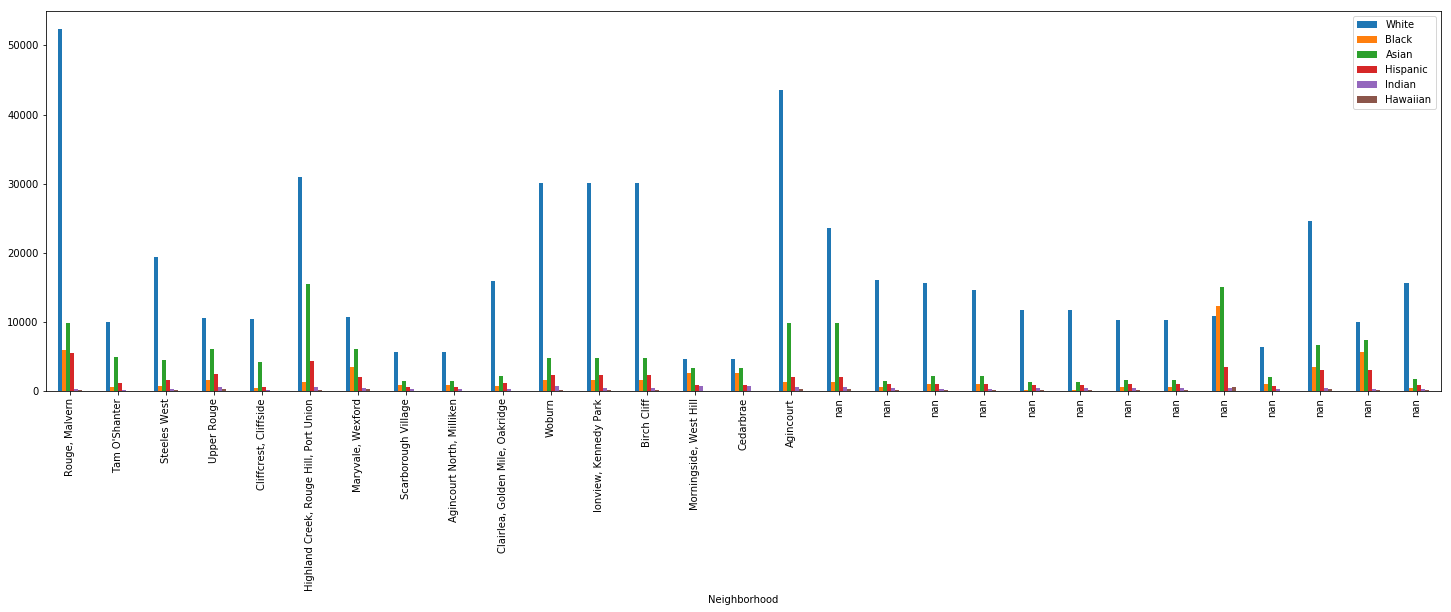

In [134]:
import matplotlib.pyplot as plt
new_scrab_population=new_scrab_population[['Neighborhood','White','Black','Asian','Hispanic','Indian','Hawaiian']]
new_scrab_population.set_index('Neighborhood',inplace=True,drop=True)

new_scrab_population.plot(kind='bar',figsize=(25,7))
plt.show()

In [135]:
scrab_school_ratings=pd.DataFrame({"Neighborhood":scrab_data["Neighborhood"],
                                      "Top School Rating":[9,10,7,8,10,10,7,10,9,8,7,0,7,0,9,7]})
                                     


In [136]:
#scrab_school_ratings.sort_values(by='Top School Rating',ascending=False)
scrab_school_ratings.set_index('Neighborhood',inplace=True,drop=True)

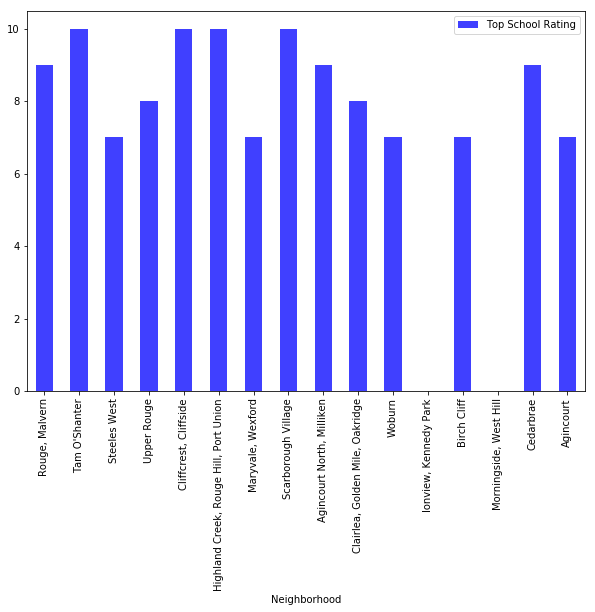

In [162]:

scrab_school_ratings.plot(kind='bar',figsize=(10,7),color='blue',alpha=0.75);


In [149]:
scrab_Avg_HousingPrice=pd.DataFrame({"Neighborhood":scrab_data["Neighborhood"],
                                      "Average_Housing_Price":[152050.0,323500.0,277900.0,202000.0,
                                                               543900.0,249400.0,158000.0,255000.0,255000.0,467000.0,259200.0,259200.0,
                                                               259200.0,205000.0,350500.0, 295000.0]})

In [150]:
scrab_Avg_HousingPrice.set_index('Neighborhood',inplace=True,drop=True)

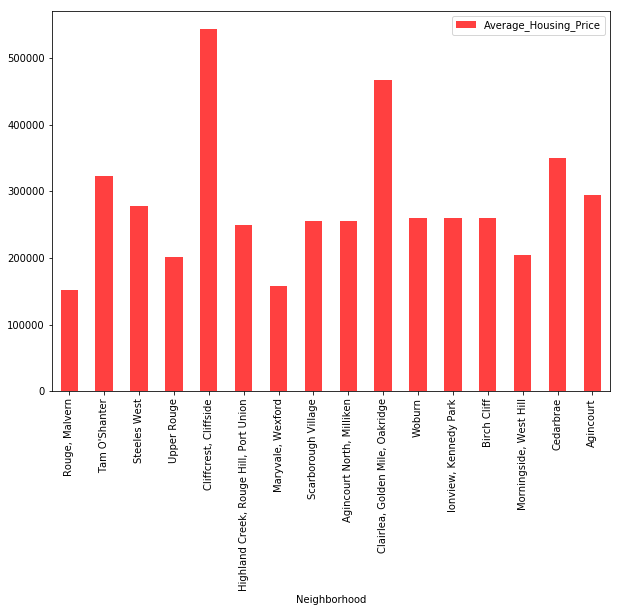

In [164]:
scrab_Avg_HousingPrice.plot(kind='bar',figsize=(10,7),color='red',alpha=0.75);

#### Now lets compare 2 neighborhoods to choose one that best matches our requirements as given below
     
    1. More Indian Population
    2. Higher School Rating
    3. Reasonable Housing Price in the Range of 300k to 500k
    4. Comfortable Neighborhoods
    
    


In [152]:
#Nei1=input("Enter the Neighborhood: ")
Nei1='Agincourt'

In [153]:
#Nei2=input("Enter the Neighborhood: ")
Nei2='Cedarbrae'

In [154]:
Venue_comparison=new_scrab.loc[[Nei1,Nei2]].T
Venue_comparison

Neighborhood,Agincourt,Cedarbrae
Postcode,M1S,M1H
Borough,Scarborough,Scarborough
Latitude,43.7942,43.7731
Longitude,-79.262,-79.2395
Cluster Labels,0,2
1st Most Common Venue,Clothing Store,Indian Restaurant
2nd Most Common Venue,Pool Hall,Coffee Shop
3rd Most Common Venue,Motorcycle Shop,Bakery
4th Most Common Venue,Badminton Court,Hakka Restaurant
5th Most Common Venue,Lounge,Lounge


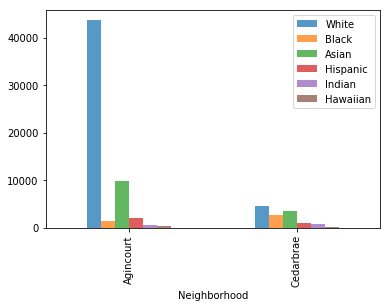

In [155]:
Population_Comparison=new_scrab_population.loc[[Nei1,Nei2]]
Population_Comparison.plot(kind='bar',alpha=0.75)

In [156]:
Population_Comparison['Indian']

Neighborhood
Agincourt    636
Cedarbrae    783
Name: Indian, dtype: int64

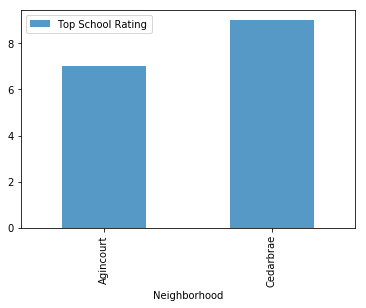

In [157]:
School_rating_comparison=scrab_school_ratings.loc[[Nei1,Nei2]]
School_rating_comparison.plot(kind='bar',alpha=0.75);

In [158]:
School_rating_comparison

,Top School Rating
Neighborhood,
Agincourt,7
Cedarbrae,9


In [159]:
Avg_housing_price_comparison=scrab_Avg_HousingPrice.loc[[Nei1,Nei2]]
Avg_housing_price_comparison

,Average_Housing_Price
Neighborhood,
Agincourt,295000.0
Cedarbrae,350500.0


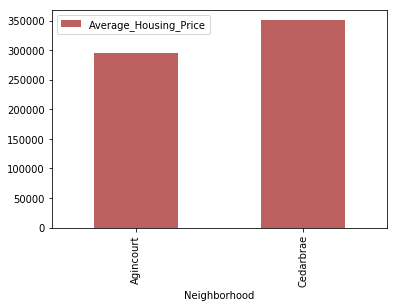

In [166]:
Avg_housing_price_comparison.plot(kind='bar',alpha=0.75,color='brown');

### Discussion and Conclusion: 

This Analysis concludes that compared to Agincourt, Cedarbrae has the higher number of Indian population, good school rating of 9 and a reasonable avg housing price of around 360K ,also top 10 common venues shows Cedarbrae has gotton a good neighborhood with Indian Restautrant, Cafe, Sandwich Place, Baseball Field etc. Hence Cedarbrae wins over Agincourt!

Thank You!